In [3]:
import cv2
import matplotlib.pyplot as plt

In [37]:
# img=cv2.imread('mask.jpg')
# print(img.shape)
# plt.imshow(img[:,:,::-1])

In [38]:
# img2=cv2.resize(img,dsize=(300,300))
# plt.imshow(img2[:,:,::-1])

In [209]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontface.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

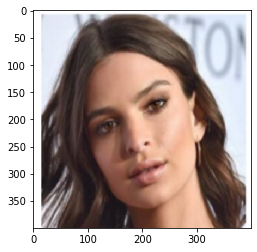

In [363]:
img=cv2.imread('rr.PNG')
img2=cv2.resize(ksh,(400,400))
plt.imshow(img2[:,:,::-1])

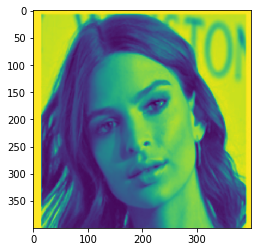

In [364]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

In [365]:
faces = face_cascade.detectMultiScale(gray) #사진정보,정밀도,얼굴 사이의 최소간격
for (x,y,w,h) in faces:
    cv2.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2) #cv2.rectangle(img, start, end, color, thickness)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img2[y:y+h, x:x+w]
    eyes =eye_cascade.detectMultiScale(roi_gray,1.1,4)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_gray,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2.imshow('img',gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

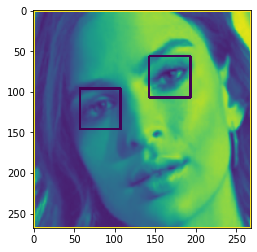

In [366]:
plt.imshow(roi_gray)

In [367]:
eyes

array([[142,  56,  51,  51],
       [ 57,  96,  50,  50]], dtype=int32)

In [368]:
eye_1=eyes[0]
eye_2=eyes[1]

if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

In [369]:
# Calculating coordinates of a central points of the rectangles
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0] 
left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]
 
cv2.circle(roi_gray, left_eye_center, 5, (255, 0, 0) , -1)
cv2.circle(roi_gray, right_eye_center, 5, (255, 0, 0) , -1)
cv2.line(roi_gray,right_eye_center, left_eye_center,(0,200,200),3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 133, ..., 195, 195, 255],
       ...,
       [255, 255, 113, ...,  67,  85, 255],
       [255, 255, 114, ...,  64,  78, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [370]:
if left_eye_y > right_eye_y:
    A = (right_eye_x, left_eye_y)
   # Integer -1 indicates that the image will rotate in the clockwise direction
    direction = -1 
else:
    A = (left_eye_x, right_eye_y)
  # Integer 1 indicates that image will rotate in the counter clockwise  
  # direction
    direction = 1 

cv2.circle(roi_gray, A, 5, (255, 0, 0) , -1)
 
cv2.line(roi_gray,right_eye_center, left_eye_center,(0,200,200),3)
cv2.line(roi_gray,left_eye_center, A,(0,200,200),3)
cv2.line(roi_gray,right_eye_center, A,(0,200,200),3)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 133, ..., 195, 195, 255],
       ...,
       [255, 255, 113, ...,  67,  85, 255],
       [255, 255, 114, ...,  64,  78, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [371]:
import numpy as np

In [372]:
delta_x = right_eye_x - left_eye_x
delta_y = right_eye_y - left_eye_y
angle=np.arctan(delta_y/delta_x)
angle = (angle * 180) / np.pi

In [373]:
# Width and height of the image
h, w = img2.shape[:2]
# Calculating a center point of the image
# Integer division "//"" ensures that we receive whole numbers
center = (w // 2, h // 2)
# Defining a matrix M and calling
# cv2.getRotationMatrix2D method
M = cv2.getRotationMatrix2D(center, (angle), 1.0)
# Applying the rotation to our image using the
# cv2.warpAffine method
rotated1 = cv2.warpAffine(img2, M, (w, h))
rotated = cv2.warpAffine(gray, M, (w, h))

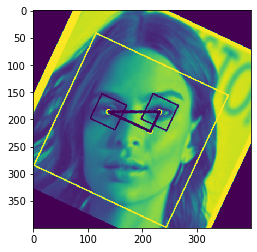

In [374]:
plt.imshow(rotated)

In [375]:
faces = face_cascade.detectMultiScale(rotated, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(rotated,(x,y),(x+w,y+h),(255,0,0),2) #cv2.rectangle(img, start, end, color, thickness)
    roi_gray = rotated[y:y+h, x:x+w]
    roi_color = rotated1[y:y+h, x:x+w]

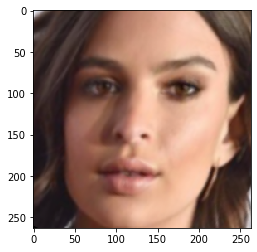

In [376]:
plt.imshow(roi_color[:,:,::-1])

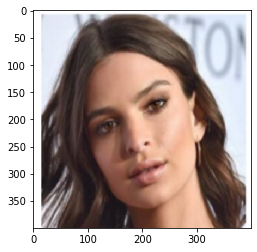

In [377]:
plt.imshow(img2[:,:,::-1])